# Plots for the 2MDM analysis

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.interpolate import griddata
from itertools import product
import pyslha

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu_r']

### Load Relic Density scan 

In [3]:
relicData1 = np.genfromtxt('../maddm_2MDM_scan/output/scan_run_01.txt',comments='#',usecols=(1,2,3),names=['mDM','mZp','Omegah2'])
relicData2 = np.genfromtxt('../maddm_2MDM_scan2/output/scan_run_01.txt',comments='#',usecols=(1,2,3,4),names=['mDM','mS','mZp','Omegah2'])

### Get Model Parameters

In [4]:
modelPars = pyslha.readSLHAFile('../maddm_2MDM_scan/Cards/param_card.dat')
pars1 = dict(gzp = modelPars.blocks['NPINPUTS'][1],
            salpha = modelPars.blocks['NPINPUTS'][2],
            gchi = modelPars.blocks['NPINPUTS'][3],
            gqV = modelPars.blocks['NPINPUTS'][4],
            gqA = modelPars.blocks['NPINPUTS'][5],
            ychi = modelPars.blocks['NPINPUTS'][6],)

modelPars = pyslha.readSLHAFile('../maddm_2MDM_scan2/Cards/param_card.dat')
pars2 = dict(gzp = modelPars.blocks['NPINPUTS'][1],
            salpha = modelPars.blocks['NPINPUTS'][2],
            gchi = modelPars.blocks['NPINPUTS'][3],
            gqV = modelPars.blocks['NPINPUTS'][4],
            gqA = modelPars.blocks['NPINPUTS'][5],
            ychi = modelPars.blocks['NPINPUTS'][6],)



textstr = '\n'.join((
    r'$g_q^V =$ %1.2f' %pars2['gqV'],
    r'$g_q^A =$ %1.2f' %pars2['gqA'],
    r'$g_\chi =$ %1.2f' %pars2['gchi'],
    r'$y_\chi =$ %1.2f' %pars2['ychi'], 
    r'$\sin\alpha =$ %1.1f' %pars2['salpha']))

### Load ATLAS curve

In [5]:
atlasCurve1 = np.array(list(zip([112.70553064275038, 178.77428998505232, 268.16143497757844, 342.0029895366218, 423.61733931240656, 509.118086696562, 563.5276532137518, 617.9372197309417, 680.1195814648729, 726.7563527653214, 788.9387144992526, 847.2346786248131, 1053.2137518684603, 1173.6920777279522, 1282.5112107623318, 1402.9895366218236, 1573.9910313901344, 1752.7653213751867, 1915.9940209267563, 2129.745889387145],[4.267425320056899, 19.203413940256045, 46.941678520625885, 72.54623044096728, 108.81934566145091, 136.55761024182075, 155.7610241820768, 174.96443812233284, 181.3655761024182, 204.83641536273115, 226.17354196301562, 258.17923186344234, 358.4637268847795, 422.47510668563297, 477.95163584637265, 535.5618776671407, 612.375533428165, 695.5903271692745, 772.4039829302986, 872.6884779516357])))
atlasCurve2 = np.array(list(zip([897.7578475336322, 862.780269058296, 823.9162929745889, 804.4843049327354, 788.9387144992526, 785.0523168908819, 804.4843049327354, 855.0074738415545, 913.3034379671151, 963.8266068759342, 1014.3497757847533, 1080.4185351270553, 1134.8281016442452, 1189.2376681614348, 1247.5336322869955, 1321.3751868460388, 1418.5351270553065],[889.7581792318633, 840.6827880512091, 793.7411095305831, 766.0028449502133, 733.9971550497866, 706.2588904694167, 684.9217638691322, 676.3869132290184, 674.25320056899, 687.0554765291606, 701.9914651493598, 725.4623044096728, 748.9331436699857, 770.2702702702702, 798.00853485064, 832.1479374110952, 872.6884779516357])))

In [6]:
label1 = r'$\Omega h^2 > 0.12$ ($S$ decoupled)'
label2 = r'$\Omega h^2 > 0.12$ ($m_S = \frac{m_{Z^\prime}+m_{\chi}}{2}$)'
colorsMono = {label1:'#a6bddb', label2 :'#ece7f2'}

legendList = []
for label, color in colorsMono.items():
    l = mpatches.Patch(color=color, label=label)
    legendList.append(l)

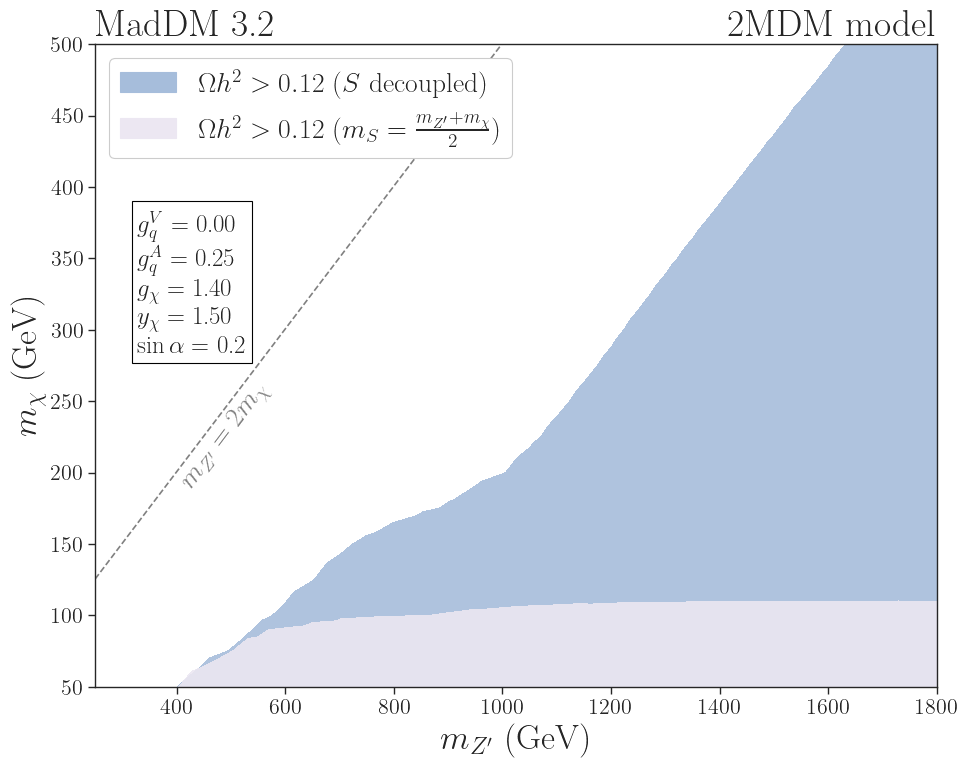

In [7]:
plt.figure(figsize=(10,8))


relicData = relicData1
c = colorsMono[label1]
pts = np.array([y for y in product(np.unique(relicData['mZp']),np.unique(relicData['mDM']))])
rPts = griddata(list(zip(relicData['mZp'],relicData['mDM'])),relicData['Omegah2'],pts)
pts = pts[~np.isnan(rPts)]
rPts = rPts[~np.isnan(rPts)]
plt.tricontourf(pts[:,0],pts[:,1], rPts, levels=[0.12,100.0], alpha=0.9, colors=c)


relicData = relicData2
c = colorsMono[label2]
pts = np.array([y for y in product(np.unique(relicData['mZp']),np.unique(relicData['mDM']))])
rPts = griddata(list(zip(relicData['mZp'],relicData['mDM'])),relicData['Omegah2'],pts)
pts = pts[~np.isnan(rPts)]
rPts = rPts[~np.isnan(rPts)]
plt.tricontourf(pts[:,0],pts[:,1], rPts, levels=[0.12,5.0], alpha=0.9,colors=c)


plt.xlim(250,1800)
plt.ylim(50,500)
    
plt.xlabel(r'$m_{Z^\prime}$ (GeV)', fontsize=25)
plt.ylabel(r'$m_{\chi}$ (GeV)', fontsize=25)
    
plt.axline((1, 1), slope=1/2, linestyle='--', color='gray')

plt.title(r'MadDM 3.2', loc='left', fontsize=27)
plt.title(r'2MDM model', loc='right', fontsize=27)

plt.legend(handles=[legendList[0], legendList[1]], 
           fontsize=20, loc='upper left',framealpha=1.0)


plt.text(0.05,0.52,textstr,fontsize=18,bbox=dict(facecolor='white', edgecolor='black'),
         transform = plt.gca().transAxes)

plt.text(400.0,190.0,r'$m_{Z^\prime} = 2 m_{\chi}$',rotation=53.0,
         fontsize=20,color='gray')

# plt.grid()
plt.tight_layout()
plt.savefig('2mdm_relicCurves.png')
plt.show()